<a href="https://colab.research.google.com/github/Itay-max/Notebooks/blob/main/paul_trap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline
import pandas as pd
from scipy.odr import *

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='E_DC[V/m]'>

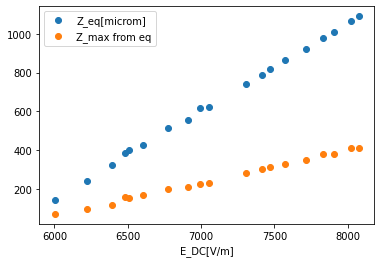

In [ ]:
df = pd.read_excel("paul.xlsx" , header = 5 , usecols = "N:P").iloc[:19]
df = df.set_index("E_DC[V/m]")
df.plot(marker = 'o' ,linestyle = '')

In [ ]:
df

,Z_eq[microm],Z_max from eq
E_DC[V/m],,
6000.420,142.50,69.54
6220.125,241.68,93.48
6389.875,321.48,118.56
6604.245,426.93,167.01
6910.765,556.89,208.05
7052.385,624.72,231.42
7414.680,786.03,301.53
7570.850,862.98,326.04
7715.865,924.54,347.70


Slope: 0.451 +/- 0.00317
Intercept: -2552.587 +/- 22.641


Text(0.5, 1.0, 'slope = 0.451086917245325')

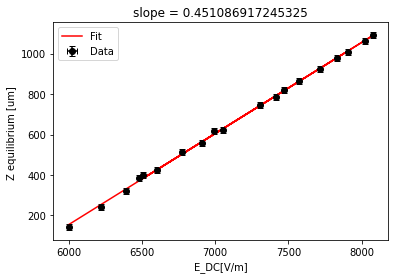

In [ ]:

x , y, sx , sy =df.index, df["Z_eq[microm]"].values, df.index*0 + 0.0001*4850, df["Z_eq[microm]"].values*0 + 13 *1.14

def linear_model(beta , x):
  return beta[0]*x  + beta[1]

# Create ODR model and data objects
model = Model(linear_model)
data = RealData(x, y, sx=sx, sy=sy)

# Run ODR with the model and data
odr = ODR(data, model, beta0=[1, 1])
output = odr.run()

# Calculate fitted y values
y_fit = linear_model(output.beta, x)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data points
ax.errorbar(x, y, xerr=sx, yerr=sy, fmt='o', color='k', ecolor='k', capsize=3, label='Data')

# Plot the fitted line
ax.plot(x, y_fit, color='r', label='Fit')
ax.legend(loc = 'best')
slope = output.beta[0]
intercept = output.beta[1]
d_slope = output.sd_beta[0]
d_intercept = output.sd_beta[1]
print(f"Slope: {slope:.3f} +/- {d_slope:.5f}")
print(f"Intercept: {intercept:.3f} +/- {d_intercept:.3f}")
alpha  = slope
xlabel("E_DC[V/m]")
ylabel("Z equilibrium [um] ")
title(f"slope = {slope}")

In [ ]:
output.beta

array([ 4.51086917e-01, -2.55258716e+03])

Slope: 0.168 +/- 0.003
Intercept: -946.871 +/- 18.762


Text(0.5, 1.0, 'slope = 0.16831215218268974')

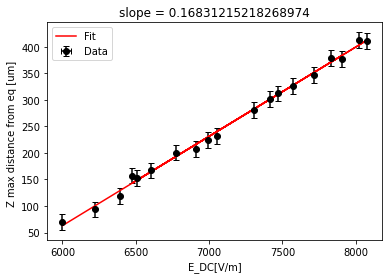

In [ ]:
x , y, sx , sy =df.index, df["Z_max from eq"].values, df.index*0 + 0.0001*4850, df["Z_max from eq"].values*0 + 13 *1.14

def linear_model(beta , x):
  return beta[0]*x  + beta[1]

# Create ODR model and data objects
model = Model(linear_model)
data = RealData(x, y, sx=sx, sy=sy)

# Run ODR with the model and data
odr = ODR(data, model, beta0=[1, 1])
output = odr.run()

# Calculate fitted y values
y_fit = linear_model(output.beta, x)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data points
ax.errorbar(x, y, xerr=sx, yerr=sy, fmt='o', color='k', ecolor='k', capsize=3, label='Data')

# Plot the fitted line
ax.plot(x, y_fit, color='r', label='Fit')
ax.legend(loc = 'best')
slope = output.beta[0]
intercept = output.beta[1]
d_slope = output.sd_beta[0]
d_intercept = output.sd_beta[1]
print(f"Slope: {slope:.3f} +/- {d_slope:.5f}")
print(f"Intercept: {intercept:.3f} +/- {d_intercept:.3f}")
delta = slope
xlabel("E_DC[V/m]")
ylabel("Z max distance from eq [um] ")
title(f"slope = {slope}")

In [ ]:
omega = 2*pi*50 #rad/sec
2*alpha/(omega*delta)**2  * 1e6

322.670702986385

In [ ]:
from scipy.odr import *
# Generate synthetic data
x , y, sx , sy =df.index, df["Z_eq[microm]"].values, df.index*0 + 0.0001*4850, df["Z_eq[microm]"].values*0 + 13 *1.14

def linear_model(beta , x):
  return beta[0]*x  + beta[1]

# Create ODR model and data objects
model = Model(linear_model)
data = RealData(x, y, sx=sx, sy=sy)

# Run ODR with the model and data
odr = ODR(data, model, beta0=[1, 1])
output = odr.run()

# Calculate fitted y values
y_fit = linear_model(output.beta, x)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data points
ax.errorbar(x, y, xerr=sx, yerr=sy, fmt='o', color='k', ecolor='k', capsize=3, label='Data')

# Plot the fitted line
ax.plot(x, y_fit, color='r', label='Fit')
ax.legend(loc = 'best')
slope = output.beta[0]
intercept = output.beta[1]
d_slope = output.sd_beta[0]
d_intercept = output.sd_beta[1]
print(f"Slope: {slope:.3f} +/- {d_slope:.3f}")
print(f"Intercept: {intercept:.3f} +/- {d_intercept:.3f}")

Beta: [ 4.51086920e-01 -2.55258718e+03]
Beta Std Error: [3.16853783e-03 2.26414285e+01]
Beta Covariance: [[ 2.93557958e-05 -2.08957189e-01]
 [-2.08957189e-01  1.49893815e+03]]
Residual Variance: 0.3419982904542645
Inverse Condition #: 0.00012275246743075172
Reason(s) for Halting:
  Sum of squares convergence


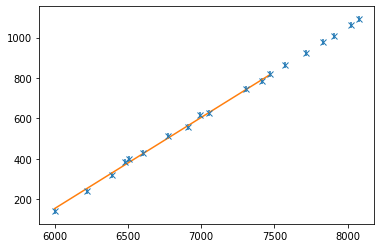

In [ ]:
from scipy.odr import *

import random

# Initiate some data, giving some randomness using random.random().
x = df.index
y = df["Z_eq[microm]"].values

x_err = x*0 +0.0001 * 4850
y_err = y*0 + 13 *1.14

# Define a function (quadratic in our case) to fit the data with.
def quad_func(p, x):
     a, b = p
     return a*x + b

# Create a model for fitting.
quad_model = Model(quad_func)

# Create a RealData object using our initiated data from above.
data = RealData(x, y, sx=x_err, sy=y_err)

# Set up ODR with the model and data.
odr = ODR(data, quad_model, beta0=[0., 1.])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
out.pprint()

x_fit = np.linspace(x[0], x[-1], 1000)
y_fit = quad_func(out.beta, x_fit)

plt.errorbar(x, y, xerr=x_err, yerr=y_err, linestyle='None', marker='x')
plt.plot(x_fit, y_fit)

plt.show()
alpha = out.beta[0]

In [ ]:
alpha

0.4510869202772004

Beta: [ 1.68312151e-01 -9.46870992e+02]
Beta Std Error: [2.62566191e-03 1.87621984e+01]
Beta Covariance: [[ 2.93502694e-05 -2.08917848e-01]
 [-2.08917848e-01  1.49865592e+03]]
Residual Variance: 0.23489053440910512
Inverse Condition #: 0.00012275251521368287
Reason(s) for Halting:
  Sum of squares convergence


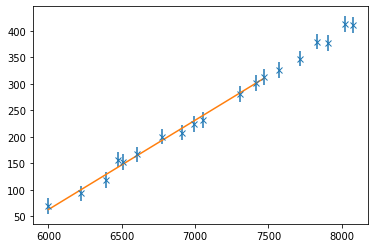

In [ ]:
from scipy.odr import *

import random

# Initiate some data, giving some randomness using random.random().
x = df.index
y = df["Z_max from eq"].values

x_err = x*0 +0.0001 * 4850
y_err = y*0 + 13 *1.14

# Define a function (quadratic in our case) to fit the data with.
def quad_func(p, x):
     a, b = p
     return a*x + b

# Create a model for fitting.
quad_model = Model(quad_func)

# Create a RealData object using our initiated data from above.
data = RealData(x, y, sx=x_err, sy=y_err)

# Set up ODR with the model and data.
odr = ODR(data, quad_model, beta0=[0., 1.])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
out.pprint()

x_fit = np.linspace(x[0], x[-1], 1000)
y_fit = quad_func(out.beta, x_fit)

plt.errorbar(x, y, xerr=x_err, yerr=y_err, linestyle='None', marker='x')
plt.plot(x_fit, y_fit)

plt.show()
delta = out.beta[0]

In [ ]:
omega = 2*pi*50 #rad/sec
2*alpha/(omega*delta)**2  * 1e6

322.6707109606106

Text(0.5, 1.0, 'trapped particle in a linear paul trap')

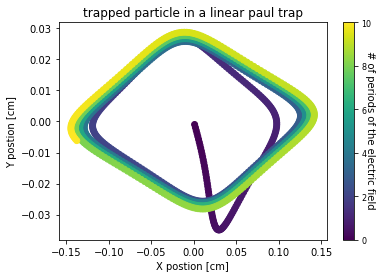

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x0 ,y0 = array([0 , 0])
vx , vy = array([0.001,-0.001])
# Meshgrid
x, y = np.meshgrid(np.linspace(-5, 5, 10), 
                   np.linspace(-5, 5, 10))

A = 10
X = []
Y = []
import time
T =  linspace(0,10 , 1000)
for t in T:
    omega = 2*pi
    u = -2*A*x*cos(omega*t)
    v = 2*A*y*cos(omega*t)
    Ex , Ey = -2*A*x0*cos(omega*t) , 2*A*y0*cos(omega*t)
    dt = T[1] - T[0]
    # Plotting Vector Field with QUIVER
    #plt.quiver(x, y, u, v, color='g')
    #plt.title(f'Vector Field t = {t}')
    #plt.quiver(x0,y0,vx, vy, color='r', scale=10)


    q = 1.0
    m = 1.0
    gamma = 0.015
    dvx , dvy = q/m*Ex*dt - gamma/m*vx , q/m*Ey*dt - gamma/m*vy
    vx+=dvx
    vy+=dvy
    dx , dy = vx*dt , vy*dt
    # Setting x, y boundary limits
    x0+=dx
    y0+=dy
    X.append(x0)
    Y.append(y0)
    #plt.xlim(-7, 7)
    #plt.ylim(-7, 7)

# Show plot with grid
    plt.grid()

    #print(Ex,Ey)
    
scatter(X,Y,c = T)
xlabel("X postion [cm]")
ylabel("Y postion [cm]")
clb=plt.colorbar()
clb.ax.tick_params(labelsize=8) 
clb.ax.set_ylabel('# of periods of the electric field ',fontsize=10 ,  rotation=270)
title("trapped particle in a linear paul trap")

Text(0.5, 1.0, 'trapped particle in a linear paul trap')

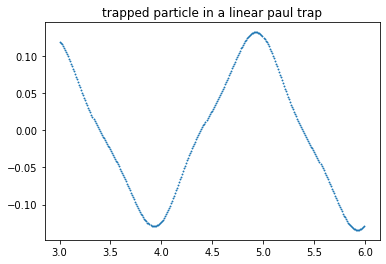

In [ ]:
scatter(T[300:600],X[300:600]   , marker = 'X' , s = 0.5)
title("trapped particle in a linear paul trap")

Text(0, 0.5, 'Y postion [cm]')

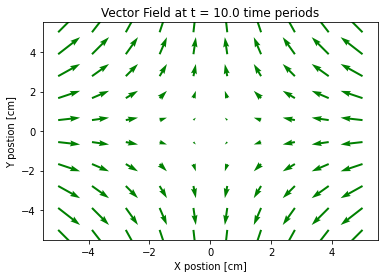

In [ ]:
plt.quiver(x, y, u, v, color='g')
plt.title(f'Vector Field at t = {t} time periods')
xlabel("X postion [cm]")
ylabel("Y postion [cm]")

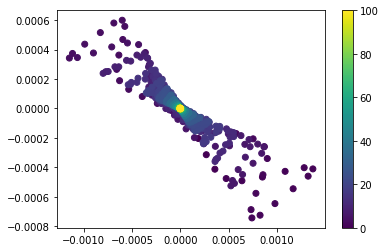

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x0 ,y0 = array([0 , 0])
vx , vy = array([0.001,-0.001])
# Meshgrid
x, y = np.meshgrid(np.linspace(-5, 5, 10), 
                   np.linspace(-5, 5, 10))

A = 5
X = []
Y = []
import time
T =  linspace(0,100 , 1000)
for t in T:
    omega = 2*pi
    u = -2*A*x*cos(omega*t)
    v = 2*A*y*cos(omega*t)
    Ex , Ey = -2*A*x0*cos(omega*t) , 2*A*y0*cos(omega*t)
    dt = T[1] - T[0]
    # Plotting Vector Field with QUIVER
    #plt.quiver(x, y, u, v, color='g')
    #plt.title(f'Vector Field t = {t}')
    #plt.quiver(x0,y0,vx, vy, color='r', scale=10)


    q = 1
    gamma = 0.015
    dvx , dvy = q*Ex*dt - gamma*vx , q*Ey*dt - gamma*vy
    vx+=dvx
    vy+=dvy
    dx , dy = vx*dt , vy*dt
    # Setting x, y boundary limits
    x0+=dx
    y0+=dy
    X.append(x0)
    Y.append(y0)
    #plt.xlim(-7, 7)
    #plt.ylim(-7, 7)

# Show plot with grid
    plt.grid()

    #print(Ex,Ey)
    
scatter(X,Y,c = T)
colorbar()